In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We cross-compare the different values of duck population given everything else fixed, getting the following list of dataframes.

In [2]:
df_vec = [[pd.read_csv(f'Results_vaccinated_{j}_ducks_{i}_dssi_0.3_dsai_0.25.csv') for i in [300, 1500, 3000, 5000]] for j in [300, 1500, 2250, 2700]]
df_list = df_vec[0]

In [3]:
df_list[0].head()

,Outbreak,Outbreak Time,Outbreak Chicken,Outbreak Duck,Outbreak Time Chicken,Outbreak Time Duck,Peak Size Whole,Peak Time Whole,Peak Size Chicken,Peak Time Chicken,Peak Size Duck,Peak Time Duck,Final Size Chicken,Final Size Duck,End Time,Detection Time Sentinel,Detection Time Random
0,True,8.262075,True,True,8.262075,20.987215,666.0,29.518043,638.0,57.701385,48.0,31.570647,2542.0,185.0,70.049520,21.0,21.0
1,False,NaN,False,False,NaN,NaN,1.0,0.413201,1.0,0.413201,0.0,0.000000,1.0,0.0,0.431446,NaN,NaN
2,False,NaN,False,False,NaN,NaN,1.0,2.101435,1.0,2.101435,0.0,0.000000,1.0,0.0,2.158914,NaN,NaN
3,True,7.274308,True,True,7.274308,19.588995,610.0,28.774446,585.0,54.871250,60.0,32.975116,2532.0,188.0,64.984483,21.0,21.0
4,True,3.973110,True,True,5.659732,11.368553,689.0,22.823419,647.0,42.973326,65.0,25.964911,2590.0,188.0,56.329454,14.0,7.0


First we compare the peak size of chickens on a histogram.

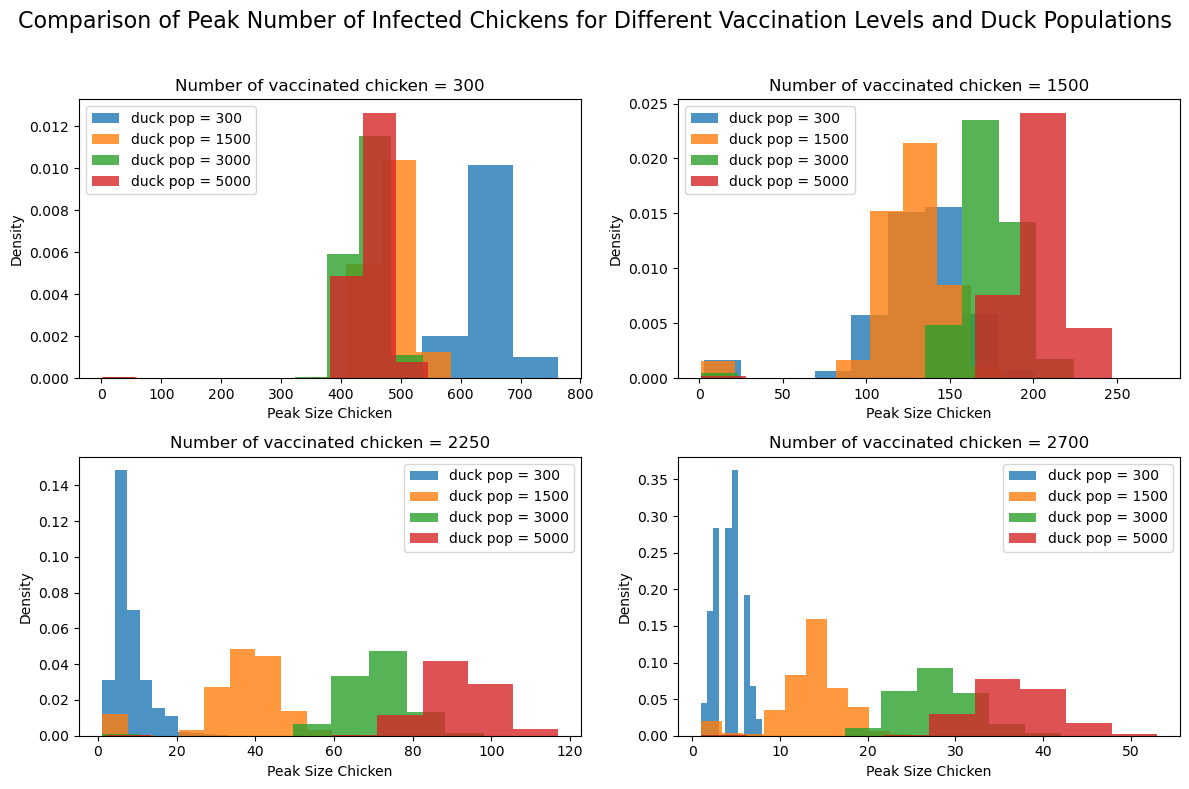

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
duck_populations = [300, 1500, 3000, 5000]
vaccination_levels = [300, 1500, 2250, 2700]

for ax, (df_list, vaccination_level) in zip(axs.flatten(), zip(df_vec, vaccination_levels)):
    for df, duck_pop in zip(df_list, duck_populations):
        df_filtered = df[df['Outbreak'] == True]
        ax.hist(df_filtered['Peak Size Chicken'], bins=10, density=True, alpha=0.8, label=f'duck pop = {duck_pop}')
    ax.set_xlabel('Peak Size Chicken')
    ax.set_ylabel('Density')
    ax.set_title(f'Number of vaccinated chicken = {vaccination_level}')
    ax.legend()

fig.suptitle('Comparison of Peak Number of Infected Chickens for Different Vaccination Levels and Duck Populations', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Then the number of days the peak time has occurred.

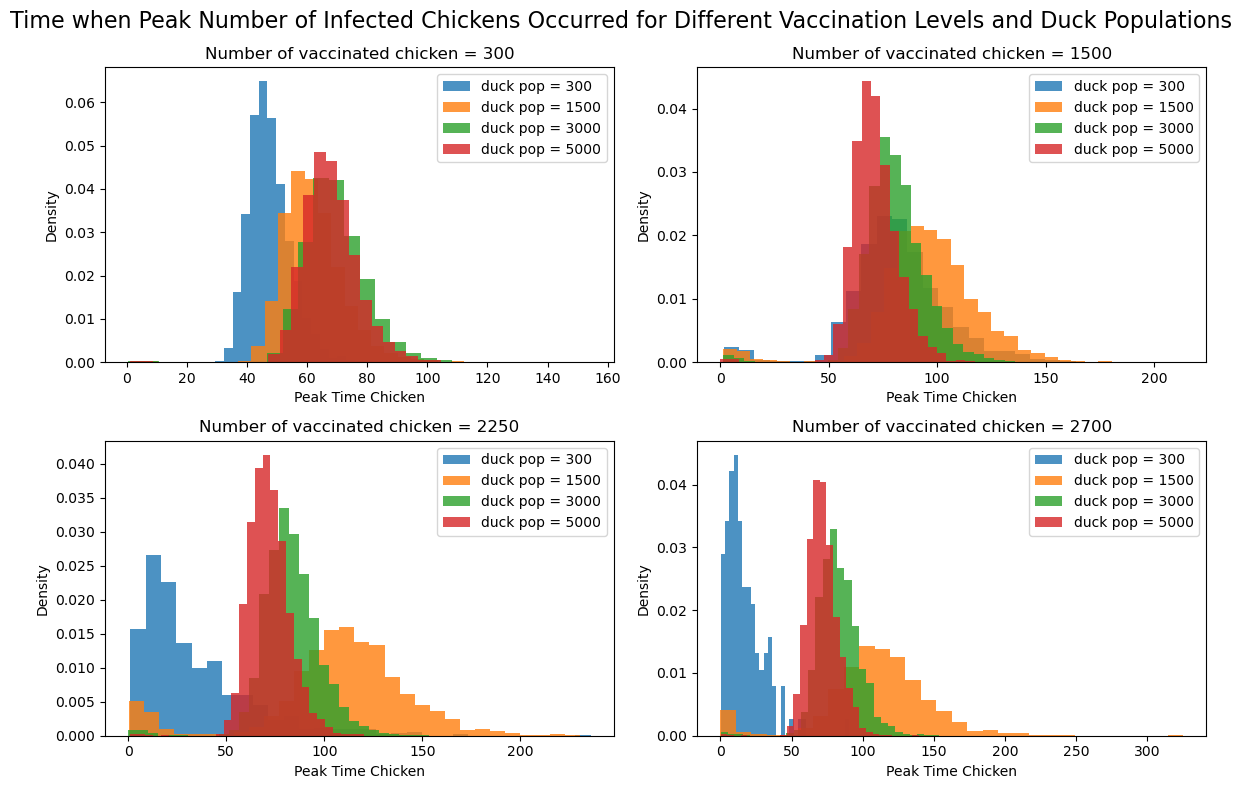

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
duck_populations = [300, 1500, 3000, 5000]
vaccination_levels = [300, 1500, 2250, 2700]

for ax, (df_list, vaccination_level) in zip(axs.flatten(), zip(df_vec, vaccination_levels)):
    for df, duck_pop in zip(df_list, duck_populations):
        df_filtered = df[df['Outbreak'] == True]
        ax.hist(df_filtered['Peak Time Chicken'], bins=30, density=True, alpha=0.8, label=f'duck pop = {duck_pop}')
    ax.set_xlabel('Peak Time Chicken')
    ax.set_ylabel('Density')
    ax.set_title(f'Number of vaccinated chicken = {vaccination_level}')
    ax.legend()

fig.suptitle('Time when Peak Number of Infected Chickens Occurred for Different Vaccination Levels and Duck Populations', fontsize=16)

plt.tight_layout()
plt.show()

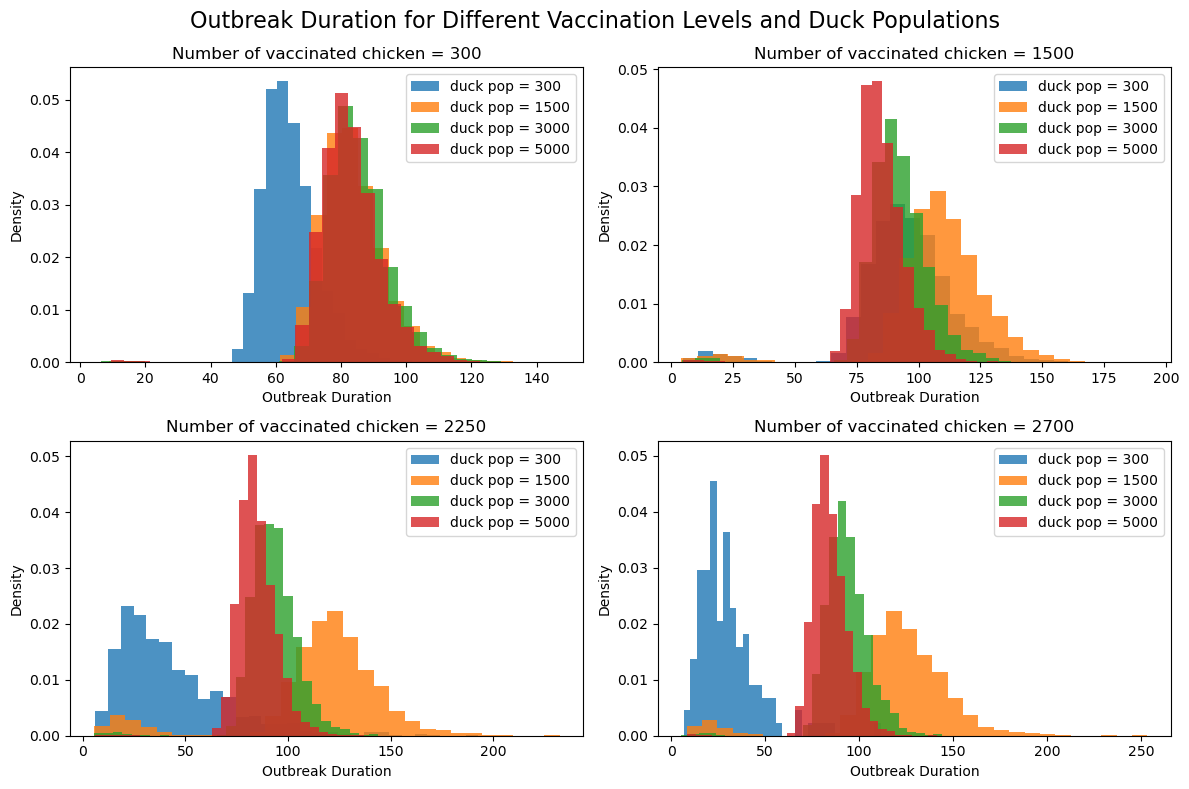

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
duck_populations = [300, 1500, 3000, 5000]
vaccination_levels = [300, 1500, 2250, 2700]

for ax, (df_list, vaccination_level) in zip(axs.flatten(), zip(df_vec, vaccination_levels)):
    for df, duck_pop in zip(df_list, duck_populations):
        df_filtered = df[df['Outbreak'] == True]
        ax.hist(df_filtered['End Time'], bins=30, density=True, alpha=0.8, label=f'duck pop = {duck_pop}')
    ax.set_xlabel('Outbreak Duration')
    ax.set_ylabel('Density')
    ax.set_title(f'Number of vaccinated chicken = {vaccination_level}')
    ax.legend()

fig.suptitle('Outbreak Duration for Different Vaccination Levels and Duck Populations', fontsize=16)

plt.tight_layout()
plt.show()

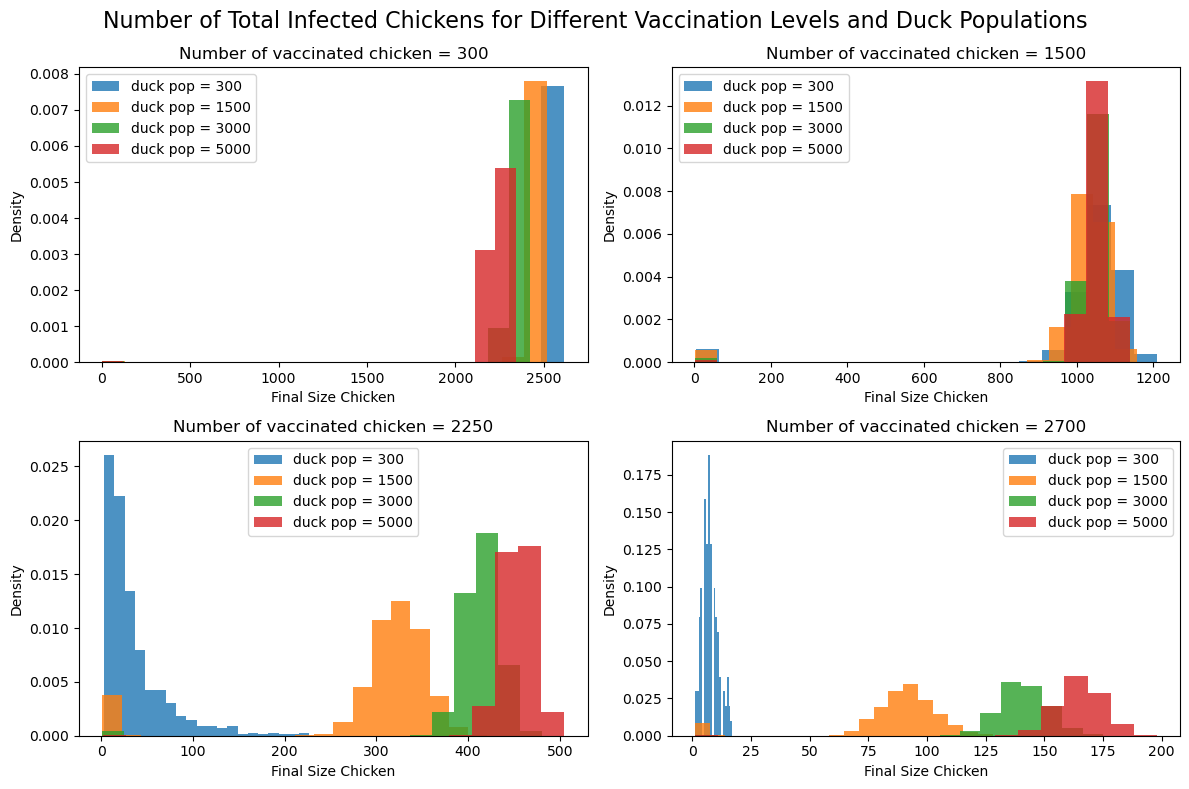

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
duck_populations = [300, 1500, 3000, 5000]
vaccination_levels = [300, 1500, 2250, 2700]

for ax, (df_list, vaccination_level) in zip(axs.flatten(), zip(df_vec, vaccination_levels)):
    for df, duck_pop in zip(df_list, duck_populations):
        df_filtered = df[df['Outbreak'] == True]
        ax.hist(df_filtered['Final Size Chicken'], bins=20, density=True, alpha=0.8, label=f'duck pop = {duck_pop}')
    ax.set_xlabel('Final Size Chicken')
    ax.set_ylabel('Density')
    ax.set_title(f'Number of vaccinated chicken = {vaccination_level}')
    ax.legend()

fig.suptitle('Number of Total Infected Chickens for Different Vaccination Levels and Duck Populations', fontsize=16)

plt.tight_layout()
plt.show()

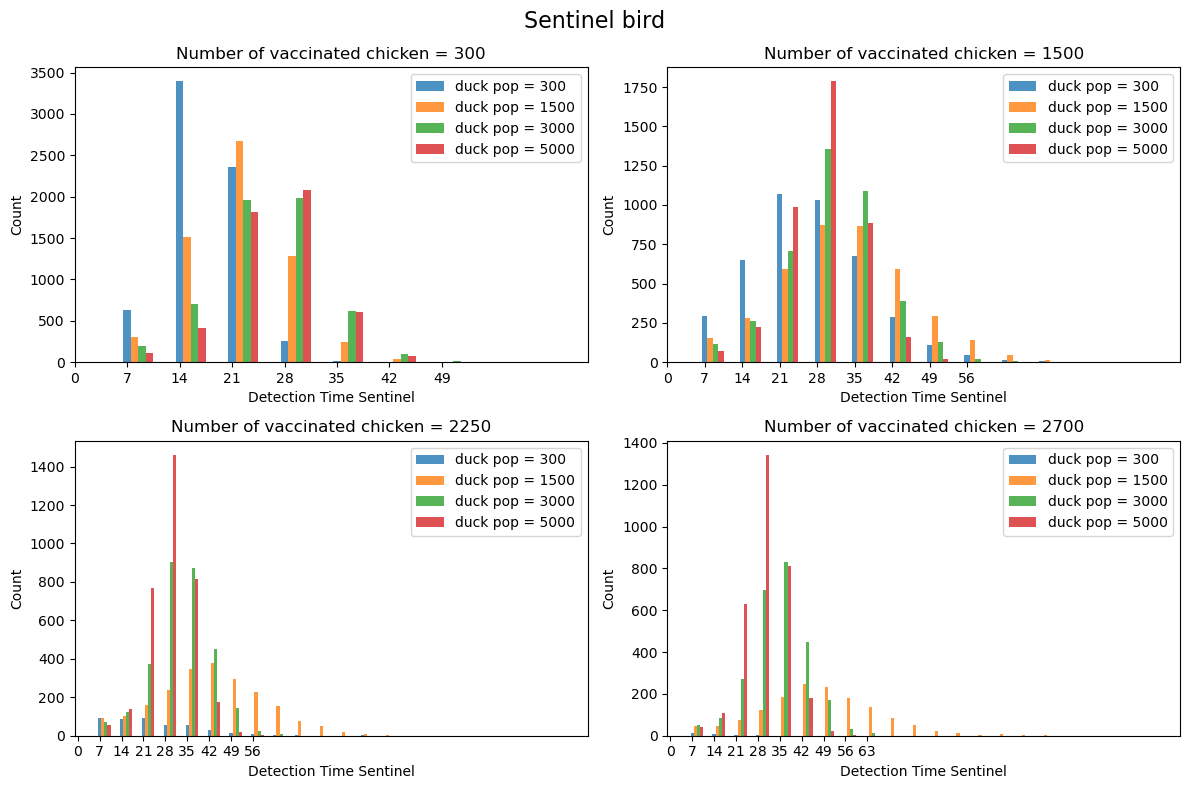

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
duck_populations = [300, 1500, 3000, 5000]
vaccination_levels = [300, 1500, 2250, 2700]
bar_width = 1  # Increased width of each bar

for ax, (df_list, vaccination_level) in zip(axs.flatten(), zip(df_vec, vaccination_levels)):
    for i, (df, duck_pop) in enumerate(zip(df_list, duck_populations)):
        df_filtered = df[df['Outbreak'] == True]
        detection_counts = df_filtered['Detection Time Sentinel'].value_counts().sort_index()
        ax.bar(detection_counts.index + i * bar_width, detection_counts.values, width=bar_width, alpha=0.8, label=f'duck pop = {duck_pop}')
    ax.set_xlabel('Detection Time Sentinel')
    ax.set_ylabel('Count')
    ax.set_title(f'Number of vaccinated chicken = {vaccination_level}')
    ax.legend()
    ax.set_xticks(np.arange(0, df_filtered['Detection Time Sentinel'].max() + 1, 7))

fig.suptitle('Sentinel bird', fontsize=16)

plt.tight_layout()
plt.show()

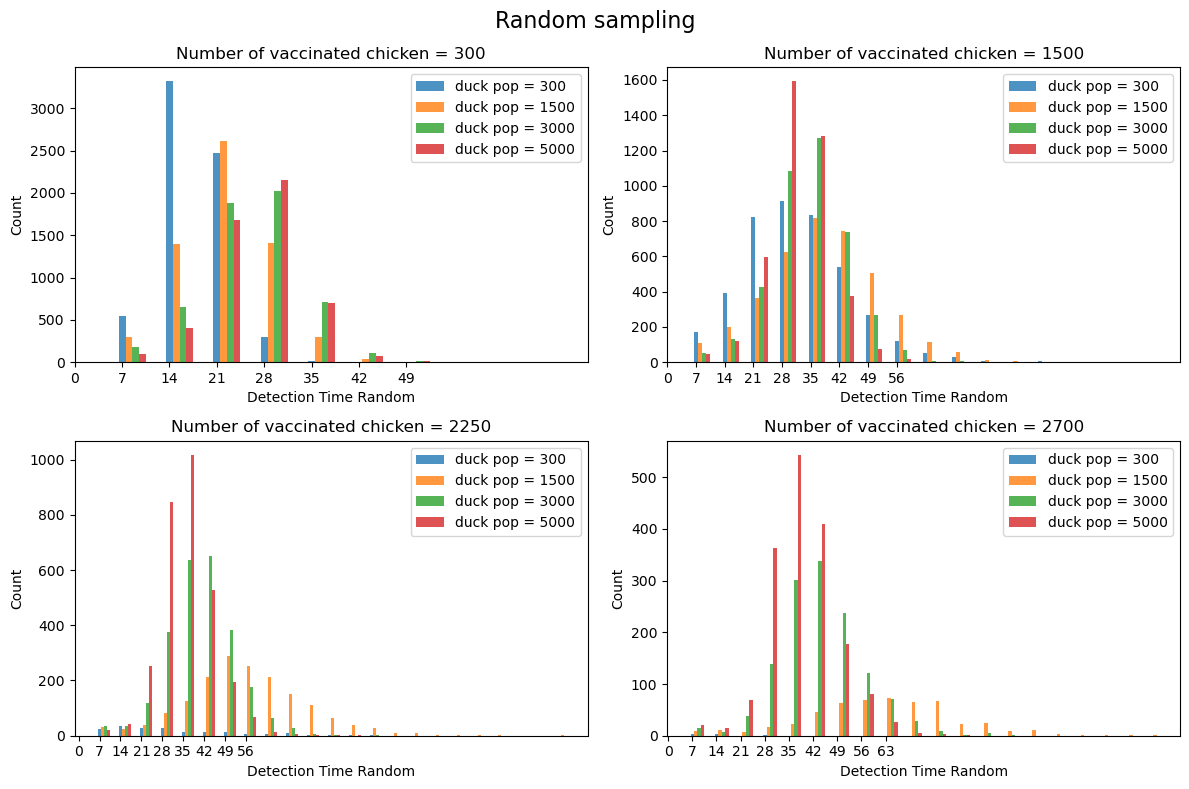

In [9]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
duck_populations = [300, 1500, 3000, 5000]
vaccination_levels = [300, 1500, 2250, 2700]
bar_width = 1  # Increased width of each bar

for ax, (df_list, vaccination_level) in zip(axs.flatten(), zip(df_vec, vaccination_levels)):
    for i, (df, duck_pop) in enumerate(zip(df_list, duck_populations)):
        df_filtered = df[df['Outbreak'] == True]
        detection_counts = df_filtered['Detection Time Random'].value_counts().sort_index()
        ax.bar(detection_counts.index + i * bar_width, detection_counts.values, width=bar_width, alpha=0.8, label=f'duck pop = {duck_pop}')
    ax.set_xlabel('Detection Time Random')
    ax.set_ylabel('Count')
    ax.set_title(f'Number of vaccinated chicken = {vaccination_level}')
    ax.legend()
    ax.set_xticks(np.arange(0, df_filtered['Detection Time Sentinel'].max() + 1, 7))


fig.suptitle('Random sampling', fontsize=16)

plt.tight_layout()
plt.show()

In [10]:
def prob_outbreak(df):
    return df['Outbreak'].sum() / len(df)

for df_list, vaccination_level in zip(df_vec, vaccination_levels):
    for df, duck_pop in zip(df_list, duck_populations):
        print(f'Probability of outbreak for vaccination level = {vaccination_level} and duck population = {duck_pop} is {prob_outbreak(df)}')


Probability of outbreak for vaccination level = 300 and duck population = 300 is 0.6661
Probability of outbreak for vaccination level = 300 and duck population = 1500 is 0.6077
Probability of outbreak for vaccination level = 300 and duck population = 3000 is 0.5582
Probability of outbreak for vaccination level = 300 and duck population = 5000 is 0.514
Probability of outbreak for vaccination level = 1500 and duck population = 300 is 0.4341
Probability of outbreak for vaccination level = 1500 and duck population = 1500 is 0.398
Probability of outbreak for vaccination level = 1500 and duck population = 3000 is 0.4114
Probability of outbreak for vaccination level = 1500 and duck population = 5000 is 0.4158
Probability of outbreak for vaccination level = 2250 and duck population = 300 is 0.125
Probability of outbreak for vaccination level = 2250 and duck population = 1500 is 0.2339
Probability of outbreak for vaccination level = 2250 and duck population = 3000 is 0.3004
Probability of outbr

In [11]:

def prob_detection(df):
    return df[(df['Detection Time Sentinel'].isnull()) & (df['Outbreak'] == True)].shape[0] / len(df)
for df_list, vaccination_level in zip(df_vec, vaccination_levels):
    for df, duck_pop in zip(df_list, duck_populations):
        print(f'Probability of detection for vaccination level = {vaccination_level} and duck population = {duck_pop} is {prob_detection(df)}')

Probability of detection for vaccination level = 300 and duck population = 300 is 0.0005
Probability of detection for vaccination level = 300 and duck population = 1500 is 0.0021
Probability of detection for vaccination level = 300 and duck population = 3000 is 0.0022
Probability of detection for vaccination level = 300 and duck population = 5000 is 0.0015
Probability of detection for vaccination level = 1500 and duck population = 300 is 0.0149
Probability of detection for vaccination level = 1500 and duck population = 1500 is 0.0122
Probability of detection for vaccination level = 1500 and duck population = 3000 is 0.0038
Probability of detection for vaccination level = 1500 and duck population = 5000 is 0.0021
Probability of detection for vaccination level = 2250 and duck population = 300 is 0.08
Probability of detection for vaccination level = 2250 and duck population = 1500 is 0.0181
Probability of detection for vaccination level = 2250 and duck population = 3000 is 0.0029
Probabil